<a href="https://colab.research.google.com/github/kanishkraj-ops/Machine-Learning/blob/main/Teen_Phone_Addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I will be analysing a dataset on teen phone addiction and then make a model to predict maybe which teen is more likely to get bad marks based on their screen time**

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset
teen_phone_addiction = pd.read_csv('teen_phone_addiction.csv')
teen_phone_addiction = teen_phone_addiction.drop("ID", axis=1)#we dont want that id column
teen_phone_addiction.head()

,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,0.1,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,0.0,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,0.8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,1.6,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,1.1,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [3]:
teen_phone_addiction.columns

Index(['Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [4]:
teen_phone_addiction.describe()

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [5]:
teen_phone_addiction.dtypes

,0
Name,object
Age,int64
Gender,object
Location,object
School_Grade,object
Daily_Usage_Hours,float64
Sleep_Hours,float64
Academic_Performance,int64
Social_Interactions,int64
Exercise_Hours,float64


In [6]:
teen_phone_addiction["Phone_Usage_Purpose"].value_counts()
#I think we can drop this column too

,count
Phone_Usage_Purpose,
Browsing,627
Other,622
Education,602
Social Media,575
Gaming,574


In [7]:
teen_phone_addiction["Location"].value_counts()

,count
Location,
North Michael,6
Lake Michael,5
South David,4
East Michael,4
North Jennifer,4
...,...
East Tiffanychester,1
Cardenasborough,1
Lake Carolynfort,1


In [8]:
teen_phone_addiction["School_Grade"] = teen_phone_addiction['School_Grade'].str.extract('(\d+)').astype(int)
teen_phone_addiction.head()
#I have transformed the school_grade column values to int64

,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,Shannon Francis,13,Female,Hansonfort,9,4.0,6.1,78,5,0.1,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,Scott Rodriguez,17,Female,Theodorefort,7,5.5,6.5,70,5,0.0,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,Adrian Knox,13,Other,Lindseystad,11,5.8,5.5,93,8,0.8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,Brittany Hamilton,18,Female,West Anthony,12,3.1,3.9,78,8,1.6,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,Steven Smith,14,Other,Port Lindsaystad,9,2.5,6.7,56,4,1.1,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
teen_phone_addiction['Gender'] = le.fit_transform(teen_phone_addiction['Gender'])
teen_phone_addiction['Location'] = le.fit_transform(teen_phone_addiction['Location'])
teen_phone_addiction['Phone_Usage_Purpose'] = le.fit_transform(teen_phone_addiction['Phone_Usage_Purpose'])
teen_phone_addiction.head()


,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,Shannon Francis,13,0,674,9,4.0,6.1,78,5,0.1,...,1.4,86,19,3.6,1.7,1.2,0,4,8.7,10.0
1,Scott Rodriguez,17,0,2412,7,5.5,6.5,70,5,0.0,...,0.9,96,9,1.1,4.0,1.8,0,2,5.3,10.0
2,Adrian Knox,13,2,1132,11,5.8,5.5,93,8,0.8,...,0.5,137,8,0.3,1.5,0.4,1,6,5.7,9.2
3,Brittany Hamilton,18,0,2501,12,3.1,3.9,78,8,1.6,...,1.4,128,7,3.1,1.6,0.8,4,8,3.0,9.8
4,Steven Smith,14,2,1911,9,2.5,6.7,56,4,1.1,...,1.0,96,20,2.6,0.9,1.1,2,10,3.7,8.6


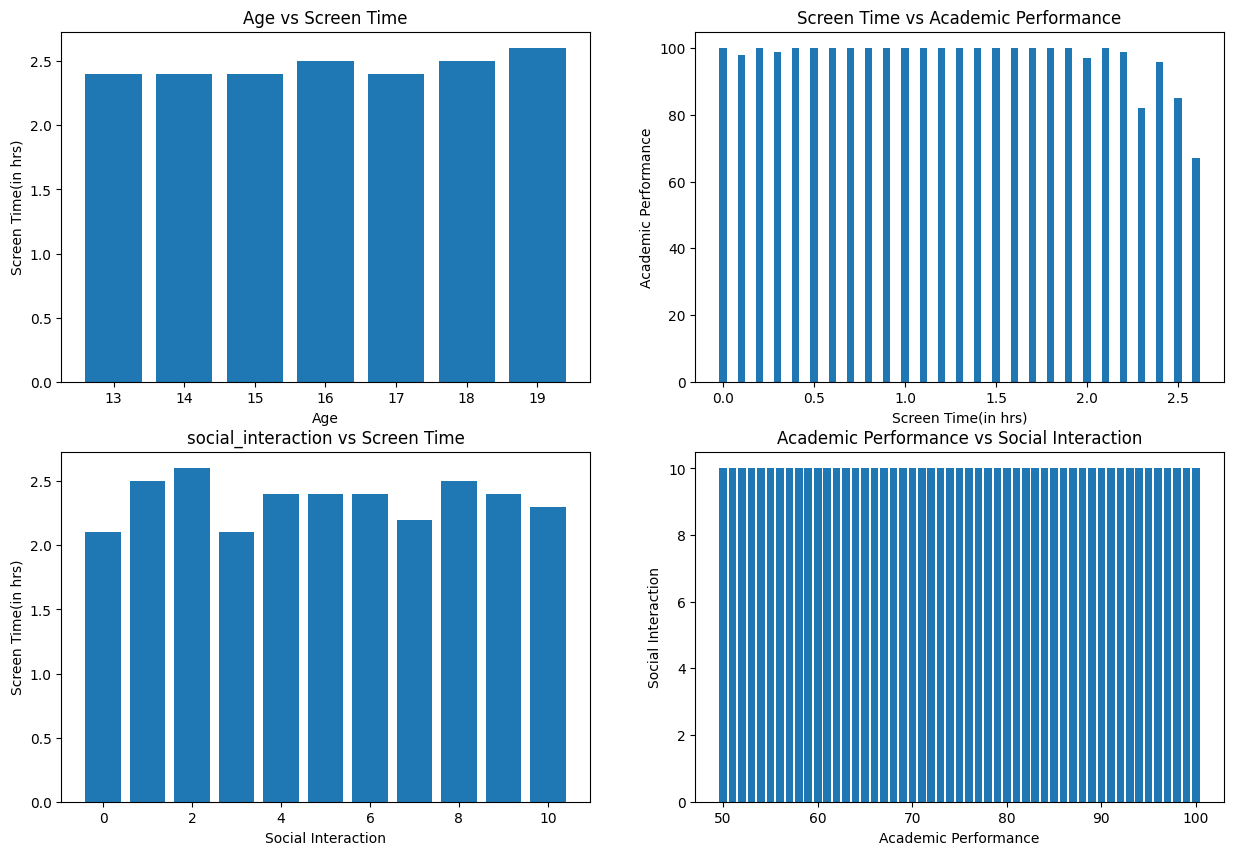

In [24]:
#lets do some plots do get a better understanding of data
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
#age vs screentime
graph = ax1.bar(teen_phone_addiction["Age"],teen_phone_addiction["Screen_Time_Before_Bed"],align='center')
ax1.set(title="Age vs Screen Time",xlabel="Age",ylabel="Screen Time(in hrs)")

#screentime vs academic performance
graph = ax2.bar(teen_phone_addiction["Screen_Time_Before_Bed"],teen_phone_addiction["Academic_Performance"],align='center', width=0.04)
ax2.set(title="Screen Time vs Academic Performance",xlabel="Screen Time(in hrs)",ylabel="Academic Performance");

graph = ax3.bar(teen_phone_addiction["Social_Interactions"],teen_phone_addiction["Screen_Time_Before_Bed"])
ax3.set(title="social_interaction vs Screen Time",xlabel="Social Interaction",ylabel="Screen Time(in hrs)")

graph = ax4.bar(teen_phone_addiction["Academic_Performance"],teen_phone_addiction["Social_Interactions"])
ax4.set(title="Academic Performance vs Social Interaction",xlabel="Academic Performance",ylabel="Social Interaction");

In [44]:
#lets make the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = teen_phone_addiction.drop("Academic_Performance",axis=1)
y = teen_phone_addiction["Academic_Performance"]
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(train_X,train_y)
pred = model.predict(test_X)
print(accuracy_score(test_y,pred))

0.028333333333333332


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(test_y,pred))

              precision    recall  f1-score   support

          50       0.00      0.00      0.00        10
          51       0.00      0.00      0.00        12
          52       0.00      0.00      0.00        13
          53       0.00      0.00      0.00         8
          54       0.00      0.00      0.00        11
          55       0.00      0.00      0.00        17
          56       0.00      0.00      0.00        16
          57       0.03      0.15      0.05        13
          58       0.09      0.14      0.11        14
          59       0.08      0.08      0.08        13
          60       0.00      0.00      0.00         5
          61       0.00      0.00      0.00        10
          62       0.02      0.10      0.04        10
          63       0.00      0.00      0.00        12
          64       0.00      0.00      0.00         5
          65       0.00      0.00      0.00        14
          66       0.00      0.00      0.00        14
          67       0.00    

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(train_X,train_y)
pred = model.predict(test_X)
print(accuracy_score(test_y,pred))
pred_df = pd.DataFrame({'Actual': test_y, 'Predicted': pred})
pred_df.head()

0.021666666666666667


,Actual,Predicted
1801,51,64
1190,74,65
1817,76,74
251,77,53
2505,77,98


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Actual']
  ys = series['Predicted']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Actual', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Actual')
_ = plt.ylabel('Predicted')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Actual']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Actual'}, axis=1)
              .sort_values('Actual', ascending=True))
  xs = counted['Actual']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Actual', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Actual')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)